possible words embed int

In [1]:
import string
import numpy as np

In [2]:
possible_words = []
with open('possible_words.txt') as fp:
    possible_words.extend([word.strip() for word in fp.readlines()])

In [3]:
mapping = {c:i for i,c in enumerate(string.ascii_lowercase[:26])}

In [4]:
out = []
for w in possible_words:
    tmp = []
    for c in w:
        tmp.append(mapping[c])
    out.append(tmp)

In [5]:
out = np.array(out)

In [9]:
# torch.save(out, 'possible_words_embed.pt')

# embed = torch.nn.Embedding(26, 8)
# e = embed(out)

# out = torch.load('possible_words_embed.pt')

In [6]:
np.save('possible_words_embed.npy',out)

study mapping

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
%matplotlib inline
pd.set_option('display.max_rows', 200)

In [2]:
import pickle
with open('mapping.pkl', 'rb') as f:
    mapping = pickle.load(f)

In [7]:
# check key in mapping is sorted, i.e. a set rather than a tuple
# out = []
# for t,_ in mapping.items():
#     out.append(all([a>b for a,b in zip(t[1:],t[:-1])]))
# all(out) -> True

True

In [3]:
val = pd.DataFrame([[len(k),v] for k,v in mapping.items()])

In [4]:
val.columns = ['length','val']

In [11]:
means = val.groupby(['length']).val.mean()

<AxesSubplot:xlabel='length'>

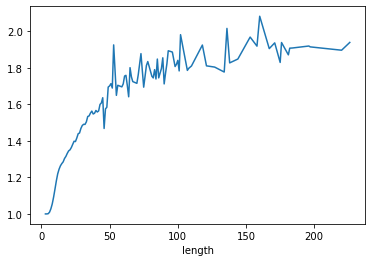

In [12]:
means.plot()

<AxesSubplot:xlabel='length'>

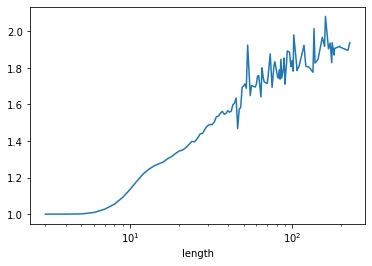

In [13]:
means.plot(logx=True)

In [8]:
counts = val.groupby(['length']).count()

<AxesSubplot:xlabel='length'>

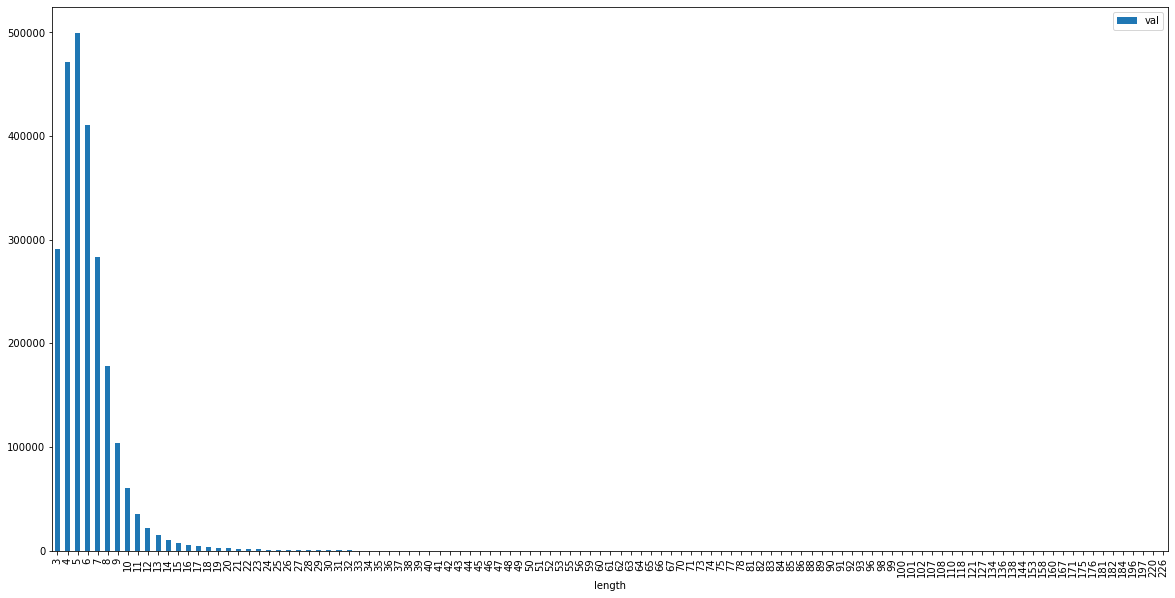

In [15]:
counts.plot(kind='bar',figsize=(20,10))

Linear regression as benchmark log(length) -> y

In [5]:
X = np.log2(val.length.values)[:,None]

In [9]:
length2weight = {k:1/v for k,v in counts.to_dict()['val'].items()}

In [10]:
weights = val.length.map(length2weight)

In [11]:
y = val.val.values

In [12]:
model = SGDRegressor(eta0=0.5)

In [13]:
model.fit(X,y,sample_weight=weights)

SGDRegressor(eta0=0.5)

In [14]:
model.coef_

array([0.13663686])

In [23]:
yhat = model.predict(X)

In [24]:
np.sum(np.abs(y-yhat)*weights)/np.sum(weights)

0.10877499312851838

In [25]:
import matplotlib.pyplot as plt

(array([6.00000e+00, 1.70000e+01, 6.50000e+01, 1.93000e+02, 6.98000e+02,
        9.63000e+02, 6.46800e+03, 1.09980e+04, 2.83170e+04, 6.76540e+04,
        1.44032e+05, 2.59622e+05, 1.26500e+03, 4.05222e+05, 5.06917e+05,
        3.85800e+03, 4.87090e+05, 2.50040e+04, 8.46100e+03, 3.22160e+05,
        1.06160e+04, 3.34800e+03, 4.42180e+04, 3.41900e+03, 3.70240e+04,
        1.73300e+03, 2.74200e+03, 9.16400e+03, 1.36050e+04, 1.23400e+03,
        2.01200e+03, 3.06600e+03, 7.23000e+02, 2.19300e+03, 2.74000e+02,
        3.41000e+02, 3.42000e+02, 2.13000e+02, 1.90000e+02, 5.40000e+01,
        3.20000e+01, 8.30000e+01, 0.00000e+00, 1.00000e+00, 1.90000e+01,
        1.00000e+01, 0.00000e+00, 1.00000e+00, 2.00000e+00, 3.00000e+00]),
 array([-0.43620838, -0.41467897, -0.39314957, -0.37162016, -0.35009076,
        -0.32856136, -0.30703195, -0.28550255, -0.26397314, -0.24244374,
        -0.22091434, -0.19938493, -0.17785553, -0.15632612, -0.13479672,
        -0.11326732, -0.09173791, -0.07020851, -0

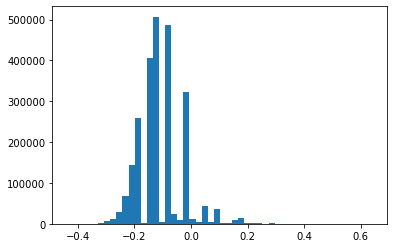

In [26]:
plt.hist(y-yhat,bins=50)

In [27]:
np.save('ys.npy',y.astype(np.float32))
np.save('weights.npy',weights.values.astype(np.float32))
np.save('length.npy',val.length.values.astype(np.float32))

In [28]:
indexes = [k for k,_ in mapping.items()]

In [29]:
with open('indexes.pkl', 'wb') as f:
    pickle.dump(indexes, f)